# MarlimR3D - Sections and Survey

In [1]:
import discretize
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Model domain

## Load resistivity cubes

The create the data file you first have to run (once) the following code in the directory `model-marlim/.`:

```
import loadmarlim
loadmarlim.extract_section()
```

In [3]:
with np.load('marlim_sections.npz') as d:
    res_h = d['res_h']
    res_v = d['res_v']

    mesh = discretize.TensorMesh([d['hx'], d['hy'], d['hz']], x0=d['x0'])
mesh

TensorMesh: 1,256,038 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x   1022    376,230.90    401,780.90     25.00     25.00    1.00
   y      1  7,517,807.00  7,517,817.00     10.00     10.00    1.00
   z   1229     -6,145.00          0.00      5.00      5.00    1.00

# CSEM data

In [4]:
data = xr.load_dataset('marlim_data.nc', engine='h5netcdf')

## Plot survey

In [5]:
data

<xarray.Dataset>
Dimensions:     (components: 6, freqs: 6, src_x: 408)
Coordinates:
  * components  (components) object 'Ex' 'Ey' 'Ez' 'Hx' 'Hy' 'Hz'
  * freqs       (freqs) float32 0.125 0.25 0.5 0.75 1.0 1.25
  * src_x       (src_x) float32 379375.0 379375.0 379475.0 ... 401175.0 401175.0
Data variables:
    data_bs     (src_x, freqs, components) float64 -1.004e-14 ... -3.254e-17
    data_il     (src_x, freqs, components) float64 -1.031e-14 ... -6.437e-17
Attributes:
    rec_dip:    0.0
    rec_theta:  0.0
    rec_x:      390275.0
    rec_y:      7517812.0
    rec_z:      -849.7838
    src_dip:    0.0
    src_theta:  0.0
    strength:   1.0

<IPython.core.display.Javascript object>


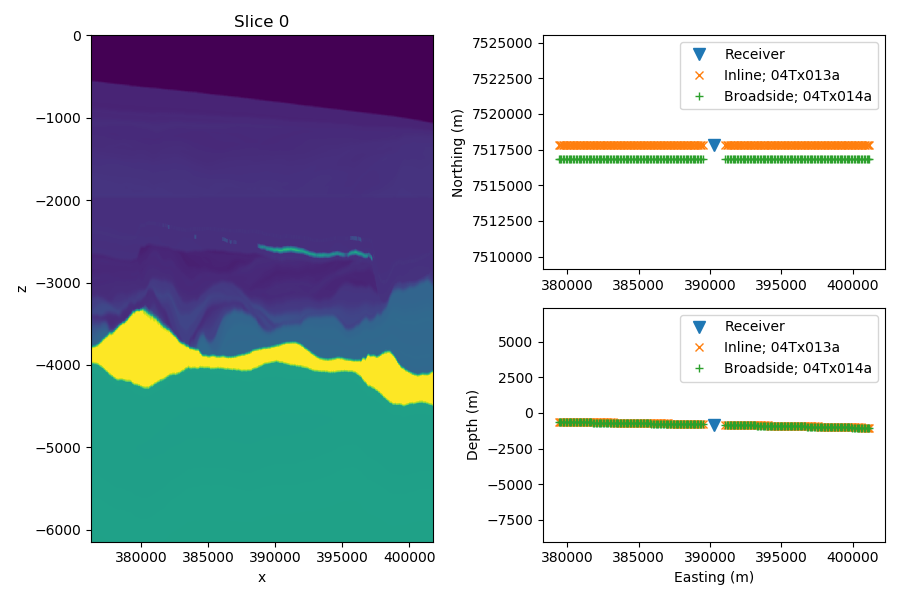

In [6]:
plt.figure(figsize=(9, 6))

ax0 = plt.subplot(121)
mesh.plotSlice(np.log10(res_h), normal='Y', clim=[np.log10(0.5), np.log10(1000)], ax=ax0)

ax1 = plt.subplot(222)
plt.plot(data.attrs['rec_x'], data.attrs['rec_y'], 'v', ms=8, label='Receiver')
plt.plot(data.src_x[::2], np.ones(data.src_x[::2].size)*data.data_il.attrs['src_y'][::2],
         'x', label=f"Inline; {data.data_il.attrs['lineid']}")
plt.plot(data.src_x[::2], np.ones(data.src_x[::2].size)*data.data_bs.attrs['src_y'][::2],
         '+', label=f"Broadside; {data.data_bs.attrs['lineid']}")
plt.legend()
plt.axis('equal')
plt.ylabel('Northing (m)')

plt.subplot(224, sharex=ax1)
plt.plot(data.attrs['rec_x'], data.attrs['rec_z'], 'v', ms=8, label='Receiver')
plt.plot(data.src_x[::2], data.data_il.attrs['src_z'],
         'x', label=f"Inline; {data.data_il.attrs['lineid']}")
plt.plot(data.src_x[::2], data.data_bs.attrs['src_z'],
         '+', label=f"Broadside; {data.data_bs.attrs['lineid']}")
plt.legend()
plt.axis('equal')
plt.xlabel('Easting (m)')
plt.ylabel('Depth (m)')

plt.tight_layout()
plt.savefig(f'../manuscript/figures/model-marlim.png', bbox_inches='tight')
plt.show()

In [8]:
import scooby
scooby.Report(['xarray', 'segyio', 'h5netcdf', discretize])

--------------------------------------------------------------------------------
  Date: Tue Apr 28 14:25:15 2020 CEST

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 7.7 GB
       Environment : Jupyter

  Python 3.7.6 (default, Jan  8 2020, 19:59:22)  [GCC 7.3.0]

            xarray : 0.15.1
            scooby : 0.5.2
        discretize : 0.4.11
             numpy : 1.18.1
             scipy : 1.4.1
           IPython : 7.13.0
        matplotlib : 3.1.3

  Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------